Processing sigma value: 1.0
Processing sigma value: 2.0
Largest Circle Parameters:
Center: (110, 258)
Radius: 15
Sigma Used: 2.0


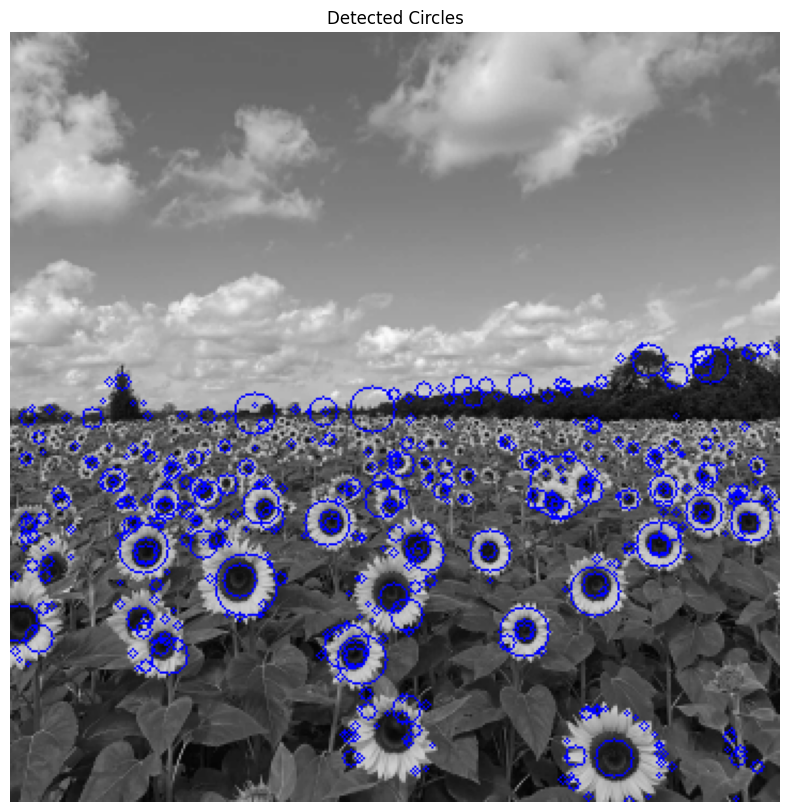

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image = cv2.imread('the_berry_farms_sunflower_field (1).jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_scale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Parameters for multi-scale blob detection
low_sigma = 1.0  
high_sigma = 2.0 
sigma_levels = 2 
blob_threshold = 0.35  

found_circles = []

for sigma_value in np.linspace(low_sigma, high_sigma, sigma_levels):
    print(f"Processing sigma value: {sigma_value}")
    smoothed_image = cv2.GaussianBlur(gray_scale, (0, 0), sigma_value)
    laplacian_result = cv2.Laplacian(smoothed_image, cv2.CV_64F)
    abs_laplacian_result = np.abs(laplacian_result)
    detection_mask = abs_laplacian_result > blob_threshold * abs_laplacian_result.max()
    contours, _ = cv2.findContours(detection_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Fit circles 
    for contour in contours:
        if len(contour) >= 5:
            (cx, cy), rad = cv2.minEnclosingCircle(contour)
            center_pos = (int(cx), int(cy))
            rad = int(rad)
            found_circles.append((center_pos, rad, sigma_value))

# Sort the detected circles 
found_circles.sort(key=lambda circle: -circle[1])

# Display the largest
largest_circle_info = found_circles[0]
largest_center, largest_radius, largest_sigma = largest_circle_info

print("Largest Circle Parameters:")
print(f"Center: {largest_center}")
print(f"Radius: {largest_radius}")
print(f"Sigma Used: {largest_sigma}")
circle_thickness = 1
annotated_image = cv2.cvtColor(gray_scale, cv2.COLOR_GRAY2BGR)

for circle in found_circles:
    circle_center, circle_radius, _ = circle
    cv2.circle(annotated_image, circle_center, circle_radius, (255, 0, 0), circle_thickness)  # Draw in blue

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Circles')
plt.show()
